In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [367]:
df = pd.read_csv('../experiments/sw-data/AMD_Ryzen_7_5800X.csv')

df['throughput'] = df['bytes_in'] / df['time']
# df.set_index(['framework', 'api', 'allocated', 'max_values', 'num_jsons'], inplace=True)
display(df)


,framework,api,allocated,max_values,num_jsons,bytes_in,bytes_out,time,throughput
0,simdjson,DOM,False,1,908945,16777222,7271552,0.034837,4.815976e+08
1,simdjson,DOM,True,1,908945,16777222,7271552,0.029734,5.642494e+08
2,simdjson,DOM (no keys),True,1,908945,16777222,7271552,0.027114,6.187729e+08
3,RapidJSON,DOM,False,1,908945,16777222,7271552,0.091581,1.831962e+08
4,RapidJSON,DOM (in situ),False,1,908945,16777222,7271552,0.069692,2.407342e+08
...,...,...,...,...,...,...,...,...,...
103,Custom,NaN,True,256,28716,16777288,29388384,0.020926,8.017398e+08
104,Custom,NaN,False,256,28716,16777288,29388384,0.023026,7.286268e+08
105,Custom,NaN,False,256,28716,16777288,29388384,0.022188,7.561254e+08
106,ANTLR4,NaN,False,256,28716,16777288,29388384,1.925730,8.712170e+06


In [368]:
dg = df.groupby(['framework', 'max_values', 'bytes_in', 'bytes_out']).agg({'throughput':'max'})
dg.sort_values(by=['framework', 'max_values'], inplace=True)
dg['Throughput (GB/s)'] = dg.throughput * 1e-9
del dg['throughput']
display(dg)


Throughput (GB/s)
framework       max_values bytes_in bytes_out                   
ANTLR4          1          16777222 7271552             0.010940
                2          16777222 7271552             0.013178
                4          16777222 11737312            0.010550
                8          16777248 16884144            0.009435
                16         16777238 21637320            0.009335
                32         16777286 25171376            0.009074
                64         16777427 27415888            0.008811
                128        16777653 28707656            0.008828
                256        16777288 29388384            0.008712
Boost Spirit.X3 1          16777222 7271552             0.904691
                2          16777222 7271552             0.909054
                4          16777222 11737312            0.637319
                8          16777248 16884144            0.482016
                16         16777238 21637320            0.450196
                32         16777286 25171376            0.420339
                64         16777427 27415888            0.395060
                128        16777653 28707656            0.435768
                256        16777288 29388384            0.431847
Custom          1          16777222 7271552             2.948053
                2          16777222 7271552             3.044233
                4          16777222 11737312            1.527132
                8          16777248 16884144            1.147351
                16         16777238 21637320            0.987227
                32         16777286 25171376            0.889773
                64         16777427 27415888            0.843574
                128        16777653 28707656            0.806292
                256        16777288 29388384            0.801740
RapidJSON       1          16777222 7271552             0.517723
                2          16777222 7271552             0.570708
                4          16777222 11737312            0.487374
                8          16777248 16884144            0.461291
                16         16777238 21637320            0.454345
                32         16777286 25171376            0.454902
                64         16777427 27415888            0.454887
                128        16777653 28707656            0.451274
                256        16777288 29388384            0.450270
simdjson        1          16777222 7271552             0.618773
                2          16777222 7271552             0.721523
                4          16777222 11737312            0.586446
                8          16777248 16884144            0.524898
                16         16777238 21637320            0.491655
                32         16777286 25171376            0.483171
                64         16777427 27415888            0.481717
                128        16777653 28707656            0.462649
                256        16777288 29388384            0.478137

In [369]:
dh = dg.unstack('framework')
dh.index.rename(inplace=True, names=['Max. values', 'Bytes in', 'Bytes out'])
dh = dh.droplevel(0, axis=1)
display(dh)

,,framework,ANTLR4,Boost Spirit.X3,Custom,RapidJSON,simdjson
Max. values,Bytes in,Bytes out,,,,,
1,16777222,7271552,0.010940,0.904691,2.948053,0.517723,0.618773
2,16777222,7271552,0.013178,0.909054,3.044233,0.570708,0.721523
4,16777222,11737312,0.010550,0.637319,1.527132,0.487374,0.586446
8,16777248,16884144,0.009435,0.482016,1.147351,0.461291,0.524898
16,16777238,21637320,0.009335,0.450196,0.987227,0.454345,0.491655
32,16777286,25171376,0.009074,0.420339,0.889773,0.454902,0.483171
64,16777427,27415888,0.008811,0.395060,0.843574,0.454887,0.481717
128,16777653,28707656,0.008828,0.435768,0.806292,0.451274,0.462649
256,16777288,29388384,0.008712,0.431847,0.801740,0.450270,0.478137


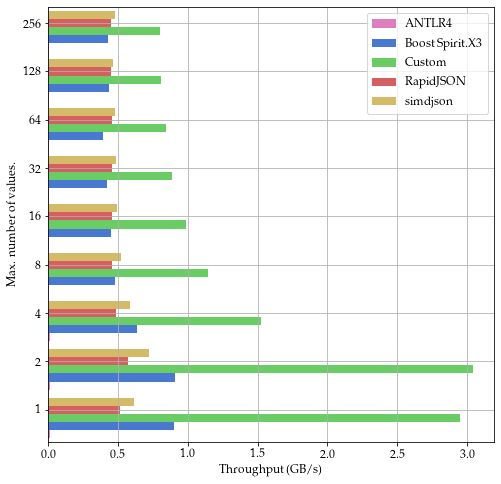

In [372]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 12
})

#dh.columns.rename(inplace=True, name='Framework')
#dh.index.rename(inplace=True, name='Max. values')

fig, ax = plt.subplots(figsize=(8, 8))
colors = ['#dc7ec0', '#4878d0', '#6acc64', '#d65f5f', '#d5bb67']

y_labels = [x[0] for x in dh.index.to_list()]
y_ticks = np.arange(0, len(y_labels))

impls = dh.columns.to_list()
bars = []
height = 1/(len(impls)+1)

for i, impl in enumerate(impls):
    x = dh[impl].to_numpy()
    y = np.arange(0, len(x))

    b = ax.barh(y=y+i*height, width=x, height=height, color=colors[i])
    bars.append(b)

ax.set_ylim(-height, len(y_labels)-height)

ax.set_yticks(y_ticks + 0.5)
ax.set_yticklabels(y_labels)
ax.set_ylabel("Max. number of values.")

ax.set_xlabel("Throughput (GB/s)")

ax.grid(which='both')

ax.legend(bars, impls)